# Question 4 Part 1

## Description

Read the Paper image and then apply edge detection filter, on the other hand, apply blur filter and the get diff and compare the result of edge detection filter with blur filter

## Import required dependencies

- Import cv2 for read and map the color channels
- Import numpy to work with arrays
- Import matplotlib to show image for each step

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Read Image

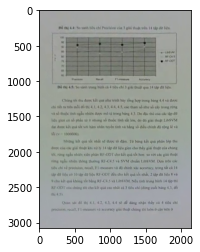

In [2]:
paper = cv2.imread("../images/paper.png")

# Convert BGR order to RGB
paper = cv2.cvtColor(paper, cv2.COLOR_BGR2RGB)

plt.imshow(paper)

## Define Laplacian Filter

Define Laplacian filter as edge detection filter

In [3]:
L = np.array([[0.0, -1.0, 0.0],
                [-1.0, 4.0, -1.0],
                [0.0, -1.0, 0.0]])

## Define Correlation Function

An operation between every part of an image and kernel

In [4]:
def correlation(image, kernel):
    image_width = image.shape[1]
    image_height = image.shape[0]
    kernel_height, kernel_width = kernel.shape

    result = np.zeros(image.shape)

    for c in range(1 if len(image.shape) < 3 else image.shape[2]):
        padding_image = np.zeros((image_height + kernel_height - 1,
                                  image_width + kernel_width - 1))

        if len(image.shape) < 3:
            padding_image[round((kernel_height - 1) / 2):image_height + round((kernel_height - 1) / 2),
                          round((kernel_width - 1) / 2):image_width + round((kernel_width - 1) / 2)] \
                = image[:, :]
        else:
            padding_image[round((kernel_height - 1) / 2):image_height + round((kernel_height - 1) / 2),
                          round((kernel_width - 1) / 2):image_width + round((kernel_width - 1) / 2)] \
                = image[:, :, c]

        for y in range(image_height + round((kernel_height - 1) / 2)):
            for x in range(image_width + round((kernel_width - 1) / 2)):
                sample = padding_image[y:y + kernel_height, x:x + kernel_width]
                if sample.shape != kernel.shape:
                    continue
                if len(image.shape) < 3:
                    result[y, x] = np.sum(sample * kernel)
                else:
                    result[y, x, c] = np.sum(sample * kernel)
                    
    result = result / result.max() * 255

    return result

Due to the low speed of this method, we use OpenCV method for this question

## Apply Laplacian Filter

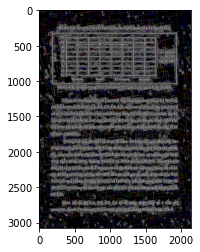

In [5]:
# Apply filter
# -1 means return type is same as input type
paper_laplacian = cv2.filter2D(paper, cv2.CV_32F, L).astype('uint8')

plt.imshow(paper_laplacian)

## Blur Paper With Median Filter

Blur a paper with 3x3, 5x5 and 11x11 filter

I recommend median filter because keep edge better than mean filter

In [6]:
paper_median_blur_3 = cv2.medianBlur(paper, 3)
paper_median_blur_5 = cv2.medianBlur(paper, 5)
paper_median_blur_11 = cv2.medianBlur(paper, 11)

## Diff Blur Image and Laplacian With Orginal Image

Text(0.5, 1.0, 'Laplacian')

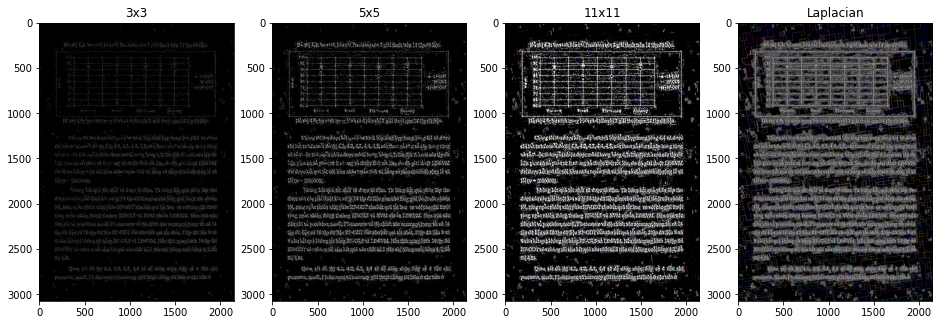

In [7]:
f, subplt = plt.subplots(1,4,figsize=(16,10))
subplt[0].imshow(paper - paper_median_blur_3)
subplt[0].set_title("3x3")
subplt[1].imshow(paper - paper_median_blur_5)
subplt[1].set_title("5x5")
subplt[2].imshow(paper - paper_median_blur_11)
subplt[2].set_title("11x11")
subplt[3].imshow(paper_laplacian)
subplt[3].set_title("Laplacian")

## Calculate Sharpened Image

Text(0.5, 1.0, 'Laplacian Filter')

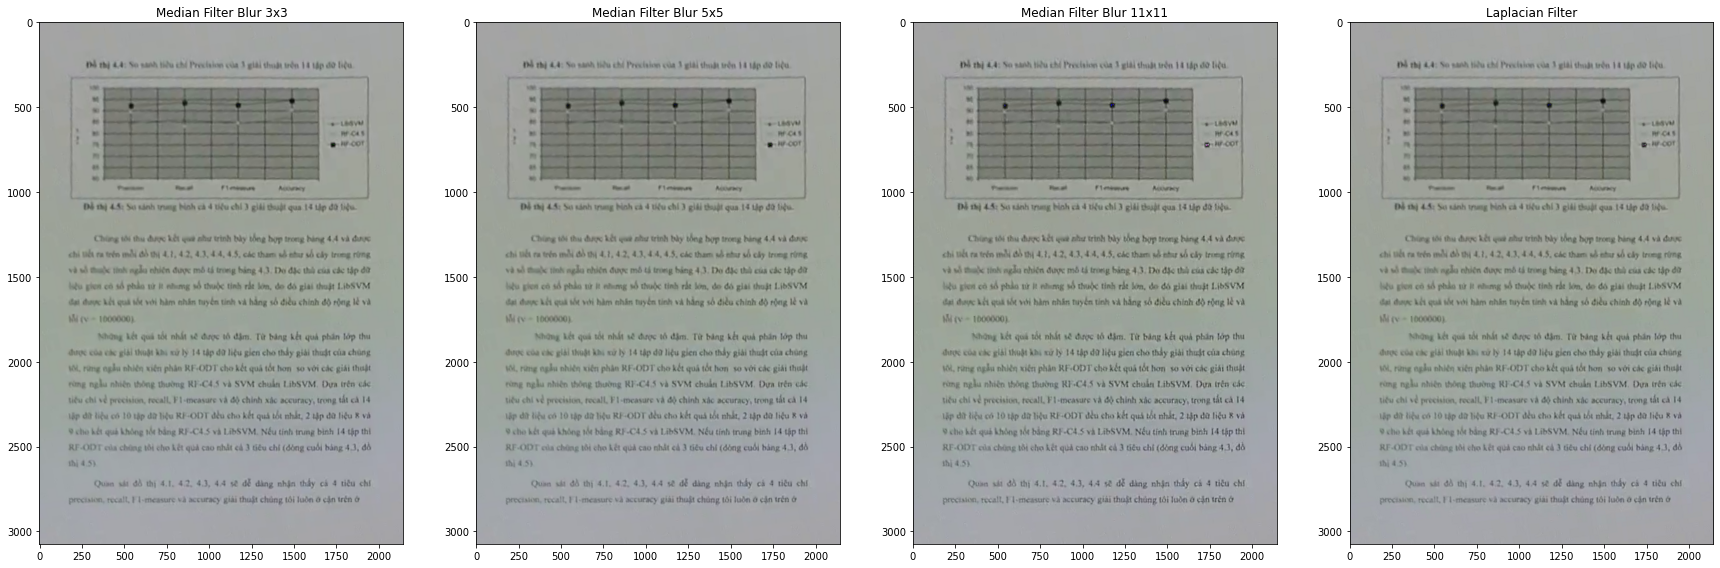

In [8]:
f, subplt = plt.subplots(1,4,figsize=(30,25))
subplt[0].imshow(paper + paper - paper_median_blur_3)
subplt[0].set_title("Median Filter Blur 3x3")
subplt[1].imshow(paper + paper - paper_median_blur_5)
subplt[1].set_title("Median Filter Blur 5x5")
subplt[2].imshow(paper + paper - paper_median_blur_11)
subplt[2].set_title("Median Filter Blur 11x11")
subplt[3].imshow(paper + paper_laplacian)
subplt[3].set_title("Laplacian Filter")

As result, the 11x11 median blur have better result versus other filters, but the laplacian filter make image shaper versus 3x3 and 5x5 median blur filter